Evaluando rostros...


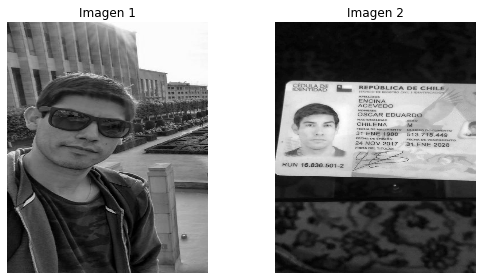

Similitud de rostros: 83.54%
Validacion de rostros correcta. Misma persona entre carnet y selfie
0
0


In [23]:
from __future__ import print_function, unicode_literals
import json
from facepplib import FacePP, exceptions
from skimage import io
from skimage import transform 
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import numpy as np
import urllib
import cv2

#Funcion para tratamiento de imagen
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = transform.resize(image, (1000,800))
    image = rgb2gray(image)
    # return the image
    return image

face_detection=""
faceset_initialize=""
face_search=""
face_landmarks=""
dense_facial_landmarks=""
face_attributes=""
beauty_score_and_emotion_recognition=""

#Funcion para comparar rostros
def face_comparing(app):
    """
    Compare two faces and decide whether they are from the same person.
    """
    print('Evaluando rostros...')

    img_url1 = 'https://i.ibb.co/2KGwWPb/oscar.jpg'
    img_url2 = 'https://i.ibb.co/n1mkSmr/oscar-carnet2.jpg'
    
    img1 = url_to_image(img_url1)
    img2 = url_to_image(img_url2)
    
    cmp_ = app.compare.get(image_url1=img_url1,image_url2=img_url2)
    similitud = cmp_.confidence
        
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].imshow(img1, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title("Imagen 1")
    ax[1].imshow(img2, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title("Imagen 2")
    fig.tight_layout()
    plt.show()
    print('Similitud de rostros: {:.2f}%'.format(similitud)) #cmp_.confidence
    
    if similitud > 80:
        validacion = 1
        print('Validacion de rostros correcta. Misma persona entre carnet y selfie')
    else:
        validacion = 0
        print('Validacion de rostros incorrecta. No son la misma persona')
    return validacion, similitud

#Comparacion de rostros:

if __name__ == '__main__':

    api_key ='xxxxxx'
    api_secret ='xxxx'

    try:
        app_ = FacePP(api_key=api_key, api_secret=api_secret)
        funcs = [
                face_detection,
                face_comparing,
                faceset_initialize,
                face_search,
                face_landmarks,
                dense_facial_landmarks,
                face_attributes,
                beauty_score_and_emotion_recognition
                ]
        face_comparing(app_)
        print(validacion)
        print(similitud)
    except exceptions.BaseFacePPError as e:
        print('Error:', e)
                
